## Importing Packages

# Data Analytics

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import os

print(os.getcwd())

/Users/javian/TheCode/Housing-Price-Time-Series-Forecasting


## Check out Datasets

In [2]:
# Load the dataset
data = pd.read_csv("./data/train-test/data_nerual_network_models.csv")

data.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.449019,1.375097,103.837619,0,0,0,0,0,0,...,0,0,0,0,-1.546558,-0.345484,-0.802967,-0.833389,-0.524994,-0.375705
1,0,12.524526,1.373922,103.855621,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.727997,-0.802967,-0.167970,-0.582020,0.258150
2,0,12.560244,1.373552,103.838169,0,0,0,0,0,0,...,0,0,0,0,-1.172367,-0.804500,-0.802967,-0.899113,-0.565965,-0.375705
3,0,12.577636,1.367761,103.855357,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.881003,-0.802967,-0.296103,-0.738546,-0.133931
4,2,12.577636,1.371626,103.857736,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.804500,-0.802967,-0.044030,-0.637076,0.258150


In [ ]:
# colab
# from google.colab import drive

# drive.mount('/content/gdrive')
# data = pd.read_csv('gdrive/My Drive/data_nerual_network_models.csv')
# data.head()

In [3]:
print(data.dtypes)

storey_range                           int64
resale_price                         float64
latitude                             float64
longitude                            float64
town_BEDOK                             int64
town_BISHAN                            int64
town_BUKIT BATOK                       int64
town_BUKIT MERAH                       int64
town_BUKIT PANJANG                     int64
town_BUKIT TIMAH                       int64
town_CENTRAL AREA                      int64
town_CHOA CHU KANG                     int64
town_CLEMENTI                          int64
town_GEYLANG                           int64
town_HOUGANG                           int64
town_JURONG EAST                       int64
town_JURONG WEST                       int64
town_KALLANG/WHAMPOA                   int64
town_MARINE PARADE                     int64
town_PASIR RIS                         int64
town_PUNGGOL                           int64
town_QUEENSTOWN                        int64
town_SEMBA

In [4]:
# Normalize numerical features
scaler = StandardScaler()
data[['floor_area_sqm', 'remaining_lease', 'sora', 'bto_supply_within_4km', 'distance2cbd']] = scaler.fit_transform(data[['floor_area_sqm', 'remaining_lease', 'sora', 'bto_supply_within_4km', 'distance2cbd']])

In [5]:
# Split dataset into features and target
X = data.drop(columns=['resale_price'])
y = data['resale_price']

In [6]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


In [8]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)
print("X_val dtype:", X_val.dtype)
print("y_val dtype:", y_val.dtype)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train dtype: float64
y_train dtype: float64
X_val dtype: float64
y_val dtype: float64
X_train shape: (144420, 49)
y_train shape: (144420,)
X_val shape: (30947, 49)
y_val shape: (30947,)


In [9]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

/Users/javian/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 126s 28ms/step - loss: 5.6379 - val_loss: 0.1080
Epoch 2/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 115s 25ms/step - loss: 0.8661 - val_loss: 0.0740
Epoch 3/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 119s 26ms/step - loss: 0.6261 - val_loss: 0.0248
Epoch 4/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 122s 27ms/step - loss: 0.4752 - val_loss: 0.0309
Epoch 5/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 119s 26ms/step - loss: 0.3481 - val_loss: 0.0325
Epoch 6/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 119s 26ms/step - loss: 0.2413 - val_loss: 0.0182
Epoch 7/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 118s 26ms/step - loss: 0.1636 - val_loss: 0.0172
Epoch 8/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 121s 27ms/step - loss: 0.1028 - val_loss: 0.0173
Epoch 9/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 117s 26ms/step - loss: 0.0621 - val_loss: 0.0157
Epoch 10/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 117s 26ms/step - loss: 0.0365 - val_loss: 0.0142
Epoch 11/100
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 116s 26ms/step - loss: 0.0228 - val

In [11]:
model.save("trained_lstm_model.keras")

In [12]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

968/968 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0071
Test Loss: 0.007138872519135475


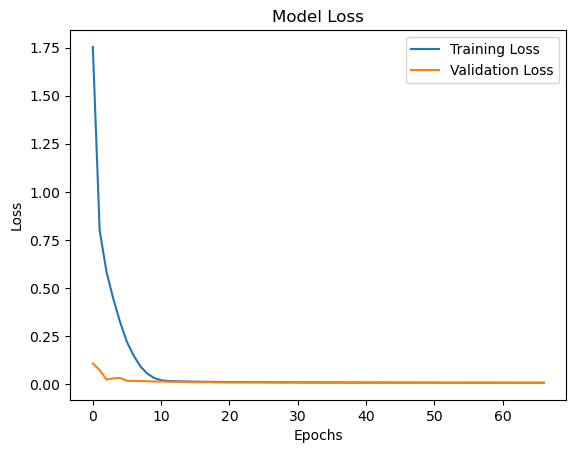

In [13]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Make predictions
predictions = model.predict(X_test)

968/968 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


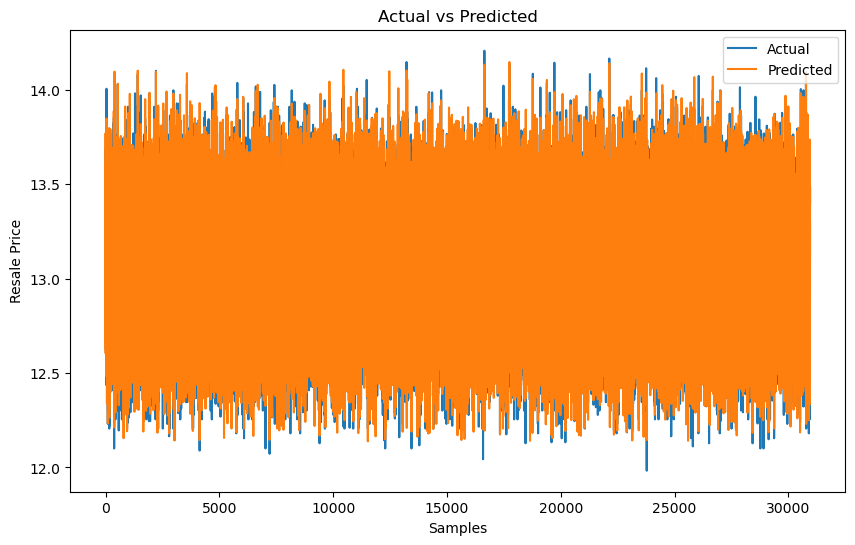

In [15]:
# Visualize predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Resale Price')
plt.legend()
plt.show()

# Using on Actual Data

In [17]:
from tensorflow.keras.models import load_model

# Assuming your model is saved as 'trained_model.h5'
# model = load_model('gdrive/My Drive/trained_lstm_model.keras')

In [19]:
test_data = pd.read_csv('./data/train-test/2024-data.csv')
test_data.head()

,storey_range,resale_price,latitude,longitude,year,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.570716,1.373346,103.836459,2024,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.607778,2.175147,-0.970227,-0.563772,-0.375705
1,1,12.683858,1.373401,103.849073,2024,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.448652,2.175147,-0.345136,-0.596351,-0.340607
2,0,13.161584,1.365266,103.844538,2024,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
3,8,13.384728,1.365266,103.844538,2024,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
4,1,12.747815,1.366048,103.838123,2024,0,0,0,0,0,...,0,0,0,0,-1.255521,-1.639909,2.175147,-0.940479,-0.753589,0.053899


In [20]:
print(test_data.dtypes)

storey_range                           int64
resale_price                         float64
latitude                             float64
longitude                            float64
year                                   int64
town_BEDOK                             int64
town_BISHAN                            int64
town_BUKIT BATOK                       int64
town_BUKIT MERAH                       int64
town_BUKIT PANJANG                     int64
town_BUKIT TIMAH                       int64
town_CENTRAL AREA                      int64
town_CHOA CHU KANG                     int64
town_CLEMENTI                          int64
town_GEYLANG                           int64
town_HOUGANG                           int64
town_JURONG EAST                       int64
town_JURONG WEST                       int64
town_KALLANG/WHAMPOA                   int64
town_MARINE PARADE                     int64
town_PASIR RIS                         int64
town_PUNGGOL                           int64
town_QUEEN

In [21]:
from sklearn.metrics import r2_score

# Assuming X_2040 and y_2040 are your preprocessed features and target for the 2040-data.csv file
X_2040 = test_data.drop(columns=['resale_price'])
y_2040 = test_data['resale_price']

# Predict prices using the trained model
predicted_prices = model.predict(X_2040)

# Calculate accuracy (R^2 score or any other appropriate metric)
accuracy = r2_score(y_2040, predicted_prices)

print("Accuracy (R^2 score) on 2040 data:", accuracy)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy (R^2 score) on 2040 data: 0.9372142725699157
